# Homework 1

#### 20145071, Junghoon Seo

#### All codes are writen in python2. (And no obstacle in python3.)

## Homework 1 - 1

<img src="https://github.com/mikigom/mikigom_course/blob/master/MC3204/HW01/1-1.png?raw=True">

In [1]:
from math import pi, e, ceil, floor

# f_chop is three_digit chopping operation by significant digits
def f_chop(num, places = 3):
    rounded = float(format(num, '.'+ str(places) +'g'))
    if rounded > num:
        old_rounded = rounded
        diff = rounded - num
        for i in range(0, 10):
            rounded = float(format(num, '.'+ str(places) +'g'))
            num = num - diff
            if rounded == float(format(num, '.'+ str(places) +'g')) and rounded != old_rounded:
                return rounded
    else:
        return rounded
    
    return float(format(num, '.'+ str(places) +'g'))

series = [1./pow(i, 2) for i in range(1, 11)]
print("Series : ", series)

print("pi and f_chop(pi)", pi, f_chop(pi))
print("e and f_chop(e)", e, f_chop(e))

('Series : ', [1.0, 0.25, 0.1111111111111111, 0.0625, 0.04, 0.027777777777777776, 0.02040816326530612, 0.015625, 0.012345679012345678, 0.01])
('pi and f_chop(pi)', 3.141592653589793, 3.14)
('e and f_chop(e)', 2.718281828459045, 2.71)


In [2]:
# Forward Summation (Increment)
forward_sum = 0
for i in series:
    print(forward_sum + i, f_chop(forward_sum + i))
    forward_sum = f_chop(forward_sum + i)

print("forward_sum : ", forward_sum)

(1.0, 1.0)
(1.25, 1.25)
(1.3611111111111112, 1.36)
(1.4225, 1.42)
(1.46, 1.46)
(1.4877777777777776, 1.48)
(1.5004081632653061, 1.5)
(1.515625, 1.51)
(1.5223456790123457, 1.52)
(1.53, 1.53)
('forward_sum : ', 1.53)


In [3]:
series.reverse()
print("series : ", series)

('series : ', [0.01, 0.012345679012345678, 0.015625, 0.02040816326530612, 0.027777777777777776, 0.04, 0.0625, 0.1111111111111111, 0.25, 1.0])


In [4]:
# Backward Summation (Decrement)
backward_sum = 0
for i in series:
    print(backward_sum + i, f_chop(backward_sum + i))
    backward_sum = f_chop(backward_sum + i)
    
print("backward_sum : ", backward_sum)

(0.01, 0.01)
(0.02234567901234568, 0.0223)
(0.037925, 0.0379)
(0.05830816326530612, 0.0583)
(0.08607777777777778, 0.086)
(0.126, 0.126)
(0.1885, 0.188)
(0.2991111111111111, 0.299)
(0.5489999999999999, 0.549)
(1.549, 1.54)
('backward_sum : ', 1.54)


In [5]:
# Real Sum and difference by method
print(sum(series))

print("Difference with read sum is the following:")
print("Summation by decrement : {:3f}, Summation by increment : {:3f}".format(sum(series) - forward_sum, sum(series) - backward_sum))

1.54976773117
Difference with read sum is the following:
Summation by decrement : 0.019768, Summation by increment : 0.009768


The later method has lower difference than the former.

In observation, the former starts with fixed beginning position of significant digits, unit of digits.

It means, the digits under two decimal point cannot help being cropped.

However, the later doesn't. 

In summation by increment, the beginning position of significant digits can be unber unit of digits.

## Homework 1 - 2

<img src="https://github.com/mikigom/mikigom_course/blob/master/MC3204/HW01/1-2.png?raw=True">

In [6]:
def eq(x):
    return x - pow(2, -x)

In [7]:
def bisect(eq, low, high, tol, N):
    FA = eq(low)
    for i in xrange(0, N):
        p = low + (high - low)/2
        FP = eq(p)

        if FP == 0 or (high - low) < tol:
            return p

        if FA * FP > 0:
            low = p
            FA = FP
        else:
            high = p

    return 'Fail...'

In [8]:
bisect(eq = eq, low = 0., high = 1., tol = 1e-5, N = 10000)

0.6411857604980469

## Homework 1 - 3

<img src="https://github.com/mikigom/mikigom_course/blob/master/MC3204/HW01/1-3.png?raw=True">

In [9]:
# Homework 1 - 3
from math import cos, exp

def LHS(x):
    return exp(x) - 2

def RHS(x):
    return cos(exp(x) - 2)

def eq(x):
    return LHS(x) - RHS(x)

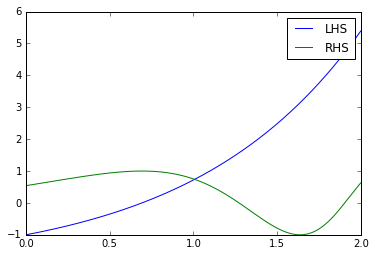

In [10]:
from pylab import *

x_axis = linspace(0., 2., 10000)
plot(x_axis, map(LHS, x_axis), label = "LHS") 
plot(x_axis, map(RHS, x_axis), label = "RHS")
legend()
show()

In [11]:
bisect(eq = eq, low = 0.5, high = 1.5, tol = 1e-5, N = 10000)

1.0076255798339844

## Homework 1 - 4

<img src="https://github.com/mikigom/mikigom_course/blob/master/MC3204/HW01/1-4.png?raw=True">

In [12]:
from math import cos, sin

def fx(x):
    return -pow(x, 3) - cos(x)

def fx_prime(x):
    return -3*pow(x, 2) + sin(x)

In [13]:
def newton(eq, eq_prime, init, tol, N):
    for i in range(0, N):
        p = init - eq(init)/eq_prime(init)
        if abs(p - init) < tol:
            return p
        init = p
            
    return "Fail..."

In [14]:
# What's the approximated root by Newton's method?
newton(eq = fx, eq_prime = fx_prime, init = -1, tol = 1e-5, N = 10000)

-0.8654740331016162

Let's take a 'Secant Method' to 'Newton's Method'.

In [15]:
def newton_by_scant(eq, p0, p1, n):
    # i = [2, n]
    pn_1, pn_2 = p1, p0
    for i in range(2, n+1):
        pn = pn_1 - eq(pn_1)*(pn_1 - pn_2)/(eq(pn_1) - eq(pn_2))
        pn_1, pn_2 = pn, pn_1

    return pn

In [16]:
# What's the p3?
newton_by_scant(eq = fx, p0 = -1., p1 = 0., n = 3)

-1.2520764889092288